<a href="https://colab.research.google.com/github/takahashi0329/DeepLerarning2022Late/blob/main/DogVsCat2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Karas を使用してディープラーニングをやってみる
##画像認識を行う

###ライブラリの読み込み

In [1]:
%matplotlib inline
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing import image
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import sys

### 学習済みモデルの読み込み

In [2]:
model = VGG16(weights='imagenet')

553476096/553467096 [==============================] - 9s 0us/step


### 画像判定のための関数

In [3]:
def predict(filename, featuresize):
  img = imge.load_img(filename, target_size=(224,224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  #学習モデルで判定実行
  preds = model.predict(preprocess_input(x))
  results = decode_predictions(preds,top=featuresize)[0]
  return results
  #関数終わり

### 画像表示のための関数

In [4]:
def showimg(filename, title, i):
  im = Image.open(filename) #画像ファイルを開く
  im_list = np.array(im) #画像ビットデータをarrayにする
  plt.subplot(2,3,i)
  plt.title(title)
  plt.axis("off")
  plt.imshow(im_list)
# 関数終わり

### Kaggeにある画像データを使用する
https://www.kaggle.com/
<br>犬猫判定用データ<br>
https://www.kaggle.com/c/dogs-vs-cats/data

## 指定されたURLからファイルをダウンロードする

In [5]:
# wegetでファイルをダウンロードする
# GoogleColadでコマンドを実行するときは、先頭に！マークを必ずつけること
# 小さいファイルをGoogleドライブからDLする時は、以下のようにURLをつけるだけでOK
!wget load-cookies /tmp/cookies.txt "https://drive.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://drive.google.com/uc?export=download&id=1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2" -O train.zip && rm -rf /tmp/cookies.txt
!wget load-cookies /tmp/cookies.txt "https://drive.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://drive.google.com/uc?export=download&id=1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2" -O test.zip && rm -rf /tmp/cookies.txt

--2022-10-04 01:03:27--  http://load-cookies/
Resolving load-cookies (load-cookies)... failed: Name or service not known.
wget: unable to resolve host address ‘load-cookies’
/tmp/cookies.txt: Scheme missing.
--2022-10-04 01:03:27--  https://drive.google.com/uc?export=download&confirm=t&id=1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2
Resolving drive.google.com (drive.google.com)... 209.85.200.101, 209.85.200.102, 209.85.200.139, ...
Connecting to drive.google.com (drive.google.com)|209.85.200.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-1s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/rrh61s79mc02btlhaocpboaq9gqsjmia/1664845350000/14334177730080324288/*/1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2?e=download&uuid=d9bd7042-5e3a-4cdf-b92f-70c02a83609e [following]
--2022-10-04 01:03:27--  https://doc-0k-1s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/rrh61s79mc02btlhaocpboaq9gqsjmia/1664845350000/14

##Colbに自分のGoogleアカウントのドライブマウントする

In [6]:
# googleドライブを操作するモジュールをimport
from google.colab import drive
# googleドライブをマウント
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##DLしてきたファイルをマウントしたディレクトリにコピーする

In [7]:
# コピーファイルを置くディレクトリを作る
import os
dir_path ="/content/dirve/My Drive/2022LATE"
#すでにディレクトリがあってもエラーにしない
os.makedirs(dir_path, exist_ok=True)
!pwd #今いるディレクトリを表示
# ファイルをコピー
!cp train.zip"/content/dirve/My Drive/2022LATE"
#tedt.zipはいったん使わないのでコピーしない

/content
cp: missing destination file operand after 'train.zip/content/dirve/My Drive/2022LATE'
Try 'cp --help' for more information.


##GoogleドライブからColabへファイルをコピー

In [8]:
!cp"/content/dirve/My Drive/2022LATE"

/bin/bash: cp/content/dirve/My Drive/2022LATE: No such file or directory


##zipファイルを解凍する

In [9]:
#unzipコマンドで解凍
!unzip -o -q "train.zip"
print("zip解凍完了")

zip解凍完了


## 解凍した画像を使って画像判定させる

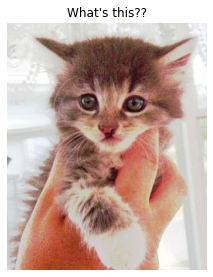

NameError: ignored

In [14]:
# 画像を指定する変数
filename = "train/cat.100.jpg"
plt.figure(figsize=(20,10))
for i in range(1):
  showimg(filename,"What's this??", i+1)
  #ループ終わり
plt.show()

  # 表示した画像を判定
results = predict( filename, 10)
for result in results:
  print(results)